In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
import os
import numpy as np
import func
import pandas as pd
import matplotlib.pyplot as plt
from params import train_csv_path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define image and batch size
img_height = 256
img_width = 256
batch_size = 64

# Load and Compile the model
model = tf.keras.models.load_model('./instance/model.h5')

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.95, decay=0.0004)

model.compile(
    optimizer=sgd, 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

# Create the Generator
test_data_gen = ImageDataGenerator(preprocessing_function=None,
    rescale=1./255)

# Read the positive test samples.
test_generator = test_data_gen.flow_from_directory(
                  directory = r"./instance/test/",
                  target_size=(img_width, img_height), color_mode='grayscale', shuffle=True,
                  batch_size=batch_size, class_mode="categorical")

print('\n# Evaluate on test data')
results = model.evaluate(test_generator)
print('test loss, test acc:', results)

Found 39900 images belonging to 3 classes.



It tooks 25 seconds

index are predictions, columns are ground truth



,Canon_Ixus70,Nikon_D200,Olympus_mju-1050SW
Canon_Ixus70,1506,11,6
Nikon_D200,11,1539,1
Olympus_mju-1050SW,3,1,3322


The mean of the confidence is: 



,Canon_Ixus70,Nikon_D200,Olympus_mju-1050SW
Canon_Ixus70,0.994620,0.744137,0.780688
Nikon_D200,0.848501,0.992968,0.903314
Olympus_mju-1050SW,0.633909,0.767351,0.997544


The standard deviation of the confidence is: 



,Canon_Ixus70,Nikon_D200,Olympus_mju-1050SW
Canon_Ixus70,0.001388,0.018106,0.038948
Nikon_D200,0.022677,0.001381,0.000000
Olympus_mju-1050SW,0.017897,0.000000,0.000380


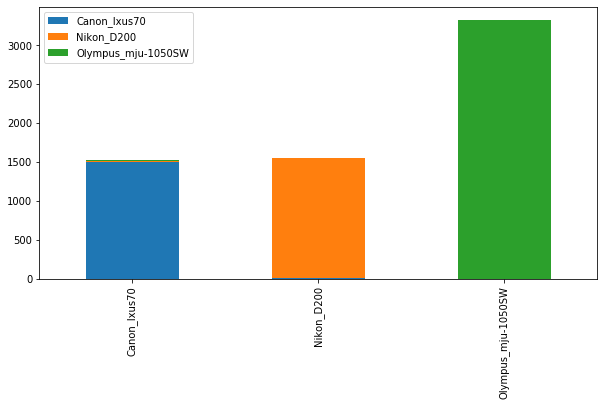

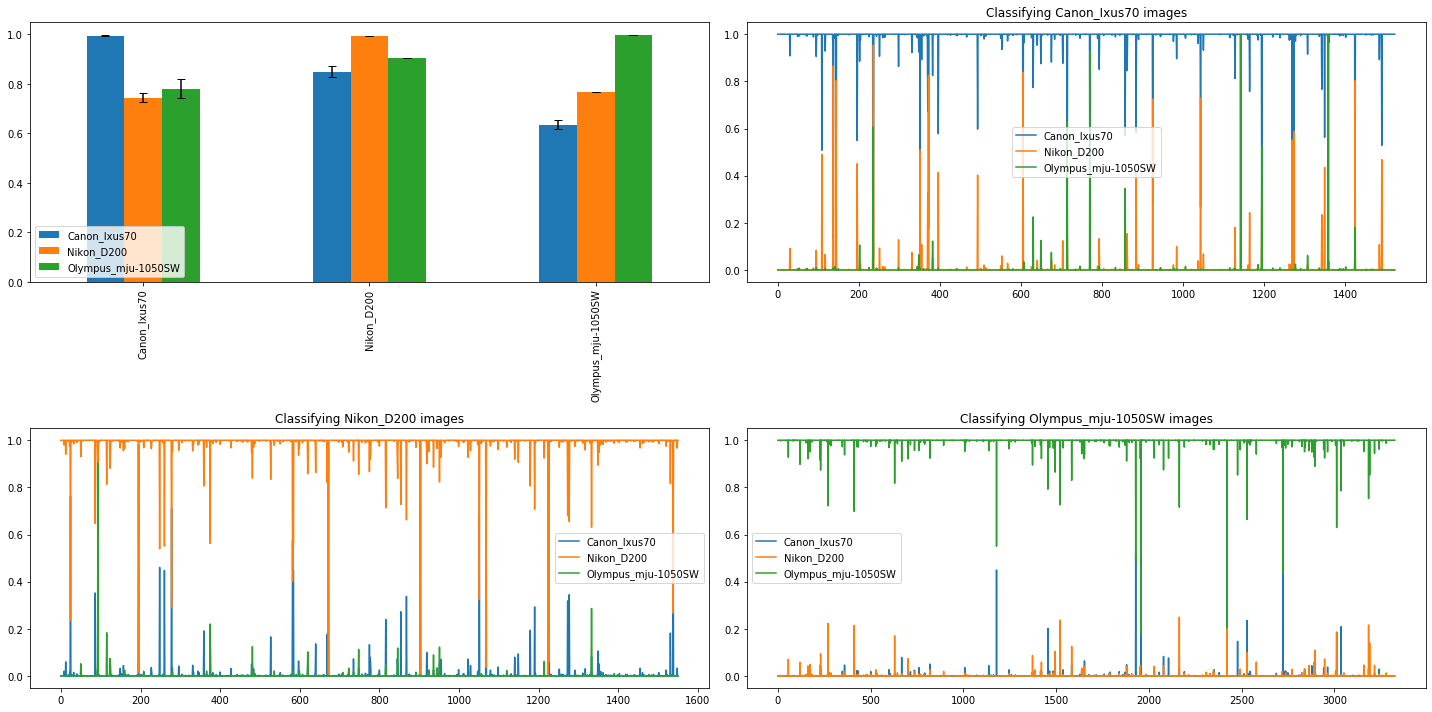

In [5]:
train_db = pd.read_csv(train_csv_path)
model_list = np.unique(train_db['brand_model']) 
# generate a histogram, which for every unseen models, how many imgs are classified.
hist, conf, pred_labels, real_labels = func.evaluate(model_list, test_generator, model, index=model_list, columns=model_list, num_batch=100)

# for all the images' real label is a certain camera, for example Canon_Ixus70, 
# how does these images are classified ? The magnitude of the histogram indicate how
# sure is the model classified the image as one camera(show by color)
df_mean, df_error = func.mean_error(conf, pred_labels, real_labels,
                                    real_model=model_list, pred_model=model_list)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
df_mean.plot.bar(yerr=df_error, ax=axes[0,0], capsize=4)
graph = {0:axes[0,1], 1:axes[1,0], 2:axes[1, 1]}

func.plot_conf(conf, pred_labels, real_labels, graph, real_model=model_list, pred_model=model_list)
plt.tight_layout()